# ¿Qué vende un coche?

La finalidad del proyecto es determinar los factores que influyen en el precio de un vehículo. Los factores más importantes a examinar son el modelo del auto, el año del modelo, la condición del vehículo, cantidad de cilindros, el tipo de combustible, el millaje, el tipo de transmisión, el tipo de vehículo, el color y los días que estuvo publicado el anuncio.

Se realizó una limpieza y corrección de los datos (valores nulos y el tipo de datos). Se estudió los parámetros principales y se trataron los valores atípicos. Posteriormente, se analizaron los parámetros principales usando histogramas y diagramas de caja.

## Inicialización

In [33]:
# Cargamos todas las librerías
import numpy as np
import pandas as pd
import datetime as dt

### Cargar datos

In [34]:
# Cargamos el archivo de datos en un DataFrame
try:
    data=pd.read_csv('/vehicles_us.csv')
except:
    data=pd.read_csv('/datasets/vehicles_us.csv')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price` — precio al que fue vendido
- `model_year` — año del modelo del vehículo
- `model` — modelo del vehículo
- `condition` — estado del vehículo 
- `cylinders` — cantidad de cilindros
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission` — automático, manual, otros
- `paint_color` — color 
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [35]:
# imprimimos la información general/resumida sobre el DataFrame
data.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [36]:
# imprimimos una muestra de datos
data.head(5)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


La columna 'condition' posee valores string que se pueden categorizar. Es necesario revisar si hay valores ausentes y correlación entre valores ausentes de distintas columnas.

In [37]:
data[data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


 La columna 'condition' será cambiada a datos enteros, categorizándolos del 0 al 5, siendo 0:'salvage' y 5:'new'. El tipo de datos de la columna 'date_posted' será cambiada a tipo fecha.  

In [38]:
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

En la tabla mostrada, se aprecian valores ausentes en parámetros importantes como 'model_year', 'odometer', 'cylinders', 'paint_color' y 'is_4wd'. Los valores ausentes en 'is_4wd' significan que el vehículo no posee tracción a las 4 ruedas, por lo que será imputado por 0. En el resto de columnas, los valores ausentes serán reemplazados por la mediana de dicha columna de acuerdo al modelo del auto.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Conclusiones y siguientes pasos

El número de filas en la tabla filtrada, que muestra las filas de valores ausentes en la columna 'model_year' nos indica que no hay una relación con los avalores ausentes de las distintas columnas.

In [40]:
#Porcentaje de valores ausentes
data['model_year'].isna().sum()*100/len(data['model_year'])

7.023774866569626

El porcentaje de los valores ausentes en 'model_year' en comparación con el conjuto de datos completos es de 7.02 %, por lo que sería necesario completar tales valores. Los valores ausentes en las columnas 'model_year', 'cylinders' y 'odometer' serán reemplazados por la mediana de dicha columna de acuerdo al modelo del auto.

## Valores ausentes

In [41]:
data['is_4wd']=data['is_4wd']==1
data['is_4wd']


0         True
1         True
2        False
3        False
4        False
         ...  
51520    False
51521    False
51522    False
51523    False
51524    False
Name: is_4wd, Length: 51525, dtype: bool

In [42]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


Rellenando valores nulos en 'model_year'.

In [43]:
#Se crea tabla dinámica con los valores de mediana del año del modelo según el modelo 
model_year=data.pivot_table(index='model',values='model_year',aggfunc='median')
model_year.columns=['model_year_median']
model_year.index.isna().sum()
data = data.merge(model_year, on='model')

In [44]:
data['model_year']=data['model_year'].where(~data['model_year'].isna(),data['model_year_median'])
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_median
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2010.0
1,3200,2004.0,bmw x5,excellent,6.0,gas,NaN,automatic,SUV,black,True,2019-04-09,10,2010.0
2,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,True,2019-03-04,52,2010.0
3,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,True,2018-08-11,19,2010.0
4,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,True,2018-07-07,9,2010.0


In [45]:
data['model_year'].isna().sum()

0

In [46]:
del(data['model_year_median'])
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,3200,2004.0,bmw x5,excellent,6.0,gas,NaN,automatic,SUV,black,True,2019-04-09,10
2,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,True,2019-03-04,52
3,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,True,2018-08-11,19
4,22914,2015.0,bmw x5,excellent,6.0,gas,69686.0,automatic,SUV,white,True,2018-07-07,9


Reemplazando valores nulos en 'cylinders'.

In [47]:
#reemplazando datos nulos en 'cylinders' por la media según 'model'
cylinders=data.pivot_table(index='model',values='cylinders',aggfunc='mean')
cylinders.columns=['cylinders_2']
data = data.merge(cylinders, on='model')
data['cylinders']=data['cylinders'].where(~data['cylinders'].isna(),data['cylinders_2'])
del(data['cylinders_2'])
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.000000,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,3200,2004.0,bmw x5,excellent,6.000000,gas,NaN,automatic,SUV,black,True,2019-04-09,10
2,8499,2009.0,bmw x5,good,6.406375,gas,104482.0,automatic,SUV,blue,True,2019-03-04,52
3,22914,2015.0,bmw x5,excellent,6.000000,gas,69686.0,automatic,SUV,white,True,2018-08-11,19
4,22914,2015.0,bmw x5,excellent,6.000000,gas,69686.0,automatic,SUV,white,True,2018-07-07,9


Reemplazando valores nulos en 'odometer'

In [48]:
#reemplazando datos nulos en 'odometer' por la media según 'model'
mean_odometer=data.pivot_table(index='model',values='odometer',aggfunc='mean')
mean_odometer.columns=['odometer_mean']
data = data.merge(mean_odometer, on='model')
data['odometer']=data['odometer'].where(~data['odometer'].isna(),data['odometer_mean'])
del(data['odometer_mean'])
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.000000,gas,145000.000000,automatic,SUV,NaN,True,2018-06-23,19
1,3200,2004.0,bmw x5,excellent,6.000000,gas,113210.140351,automatic,SUV,black,True,2019-04-09,10
2,8499,2009.0,bmw x5,good,6.406375,gas,104482.000000,automatic,SUV,blue,True,2019-03-04,52
3,22914,2015.0,bmw x5,excellent,6.000000,gas,69686.000000,automatic,SUV,white,True,2018-08-11,19
4,22914,2015.0,bmw x5,excellent,6.000000,gas,69686.000000,automatic,SUV,white,True,2018-07-07,9


Reemplazando valores nulos en 'paint_color' al valor 'unknown'.

In [49]:
data['paint_color'] = data['paint_color'].fillna('unknown')

## Corrección de los tipos de datos

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51484 entries, 0 to 51483
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51484 non-null  int64  
 1   model_year    51484 non-null  float64
 2   model         51484 non-null  object 
 3   condition     51484 non-null  object 
 4   cylinders     51484 non-null  float64
 5   fuel          51484 non-null  object 
 6   odometer      51484 non-null  float64
 7   transmission  51484 non-null  object 
 8   type          51484 non-null  object 
 9   paint_color   51484 non-null  object 
 10  is_4wd        51484 non-null  bool   
 11  date_posted   51484 non-null  object 
 12  days_listed   51484 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 5.2+ MB


In [51]:
# Agregamos valores de fecha y hora para cuando se colocó el anuncio
data['date_posted'] = pd.to_datetime(data['date_posted'], 
                                      format="%Y-%m-%d")
data['date_posted']

0       2018-06-23
1       2019-04-09
2       2019-03-04
3       2018-08-11
4       2018-07-07
           ...    
51479   2018-12-09
51480   2018-06-30
51481   2019-02-27
51482   2019-03-01
51483   2018-10-01
Name: date_posted, Length: 51484, dtype: datetime64[ns]

In [52]:
data['price']=data['price'].astype(float)
data['model_year']=data['model_year'].astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51484 entries, 0 to 51483
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51484 non-null  float64       
 1   model_year    51484 non-null  int64         
 2   model         51484 non-null  object        
 3   condition     51484 non-null  object        
 4   cylinders     51484 non-null  float64       
 5   fuel          51484 non-null  object        
 6   odometer      51484 non-null  float64       
 7   transmission  51484 non-null  object        
 8   type          51484 non-null  object        
 9   paint_color   51484 non-null  object        
 10  is_4wd        51484 non-null  bool          
 11  date_posted   51484 non-null  datetime64[ns]
 12  days_listed   51484 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 5.2+ MB


In [53]:
data.duplicated().sum()

0

## Preprocesamiento de datos

In [54]:
# Agregamos los años del vehículo cuando el anuncio se colocó
data['year_posted']=data['date_posted'].dt.year
data['year_posted']


0        2018
1        2019
2        2019
3        2018
4        2018
         ... 
51479    2018
51480    2018
51481    2019
51482    2019
51483    2018
Name: year_posted, Length: 51484, dtype: int64

In [55]:
# Agrega el millaje promedio del vehículo por año
data['mean_odometer']=data['odometer']/(1+data['year_posted']-data['model_year'])
data['mean_odometer'].isna().sum()


0

Los valores categóricos en la columna 'condition' serán reemplazados por valores del 0 al 5.

In [56]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
data['condition']=data['condition'].replace("new", "5")
data['condition']=data['condition'].replace("like new", "4")
data['condition']=data['condition'].replace("excellent", "3")
data['condition']=data['condition'].replace("good", "2")
data['condition']=data['condition'].replace("fair", "1")
data['condition']=data['condition'].replace("salvage", "0")
data['condition'].unique()

data['condition']=data['condition'].astype(int)

## Comprobamos datos limpios

In [57]:
# imprimimos la información general/resumida sobre el DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51484 entries, 0 to 51483
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51484 non-null  float64       
 1   model_year     51484 non-null  int64         
 2   model          51484 non-null  object        
 3   condition      51484 non-null  int64         
 4   cylinders      51484 non-null  float64       
 5   fuel           51484 non-null  object        
 6   odometer       51484 non-null  float64       
 7   transmission   51484 non-null  object        
 8   type           51484 non-null  object        
 9   paint_color    51484 non-null  object        
 10  is_4wd         51484 non-null  bool          
 11  date_posted    51484 non-null  datetime64[ns]
 12  days_listed    51484 non-null  int64         
 13  year_posted    51484 non-null  int64         
 14  mean_odometer  51484 non-null  float64       
dtypes: bool(1), datetim

In [58]:
# imprimir una muestra de datos
data.head(5)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,mean_odometer
0,9400.0,2011,bmw x5,2,6.000000,gas,145000.000000,automatic,SUV,unknown,True,2018-06-23,19,2018,18125.000000
1,3200.0,2004,bmw x5,3,6.000000,gas,113210.140351,automatic,SUV,black,True,2019-04-09,10,2019,7075.633772
2,8499.0,2009,bmw x5,2,6.406375,gas,104482.000000,automatic,SUV,blue,True,2019-03-04,52,2019,9498.363636
3,22914.0,2015,bmw x5,3,6.000000,gas,69686.000000,automatic,SUV,white,True,2018-08-11,19,2018,17421.500000
4,22914.0,2015,bmw x5,3,6.000000,gas,69686.000000,automatic,SUV,white,True,2018-07-07,9,2018,17421.500000


## Parámetros principales

Se estudiará los parámetros usando tablas de correlación así como histogramas y diagrama de cajas. Se verificará si la presencia de valores atípicos y se eliminará dependiendo del caso.

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [59]:
data.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,mean_odometer
price,1.000000,0.412912,0.221075,0.302337,-0.384876,0.317713,-0.000620,0.004604,0.199726
model_year,0.412912,1.000000,0.269542,-0.148301,-0.433738,0.039538,-0.005308,0.008307,0.416666
condition,0.221075,0.269542,1.000000,-0.065553,-0.268728,0.013264,-0.002391,0.003760,0.090442
cylinders,0.302337,-0.148301,-0.065553,1.000000,0.096330,0.406522,0.004145,-0.000121,-0.020306
odometer,-0.384876,-0.433738,-0.268728,0.096330,1.000000,0.046589,0.002446,-0.006404,0.207308
is_4wd,0.317713,0.039538,0.013264,0.406522,0.046589,1.000000,0.001977,-0.002419,0.063299
days_listed,-0.000620,-0.005308,-0.002391,0.004145,0.002446,0.001977,1.000000,0.011265,-0.005654
year_posted,0.004604,0.008307,0.003760,-0.000121,-0.006404,-0.002419,0.011265,1.000000,-0.100906
mean_odometer,0.199726,0.416666,0.090442,-0.020306,0.207308,0.063299,-0.005654,-0.100906,1.000000


In [60]:
#tabla nueva con los parámetros principales
new_data=data[['price','model_year','odometer','cylinders','condition']]
new_data.corr()

,price,model_year,odometer,cylinders,condition
price,1.000000,0.412912,-0.384876,0.302337,0.221075
model_year,0.412912,1.000000,-0.433738,-0.148301,0.269542
odometer,-0.384876,-0.433738,1.000000,0.096330,-0.268728
cylinders,0.302337,-0.148301,0.096330,1.000000,-0.065553
condition,0.221075,0.269542,-0.268728,-0.065553,1.000000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'model_year'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'cylinders'}>],
       [<AxesSubplot:title={'center':'condition'}>, <AxesSubplot:>]],
      dtype=object)

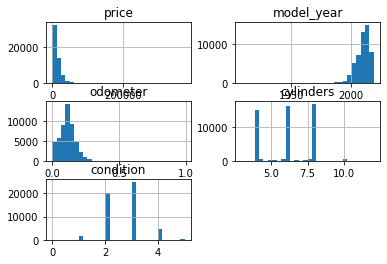

In [61]:
#Histrograma de la nueva tabla
new_data.hist(bins=30)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='model_year', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='cylinders', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='model_year'>,
        <AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='odometer', ylabel='model_year'>,
        <AxesSubplot:xlabel='cylinders', ylabel='model_year'>,
        <AxesSubplot:xlabel='condition', ylabel='model_year'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='model_year', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='cylinders', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='cylinders'>,
        <AxesSubplot:xlabel='model_year',

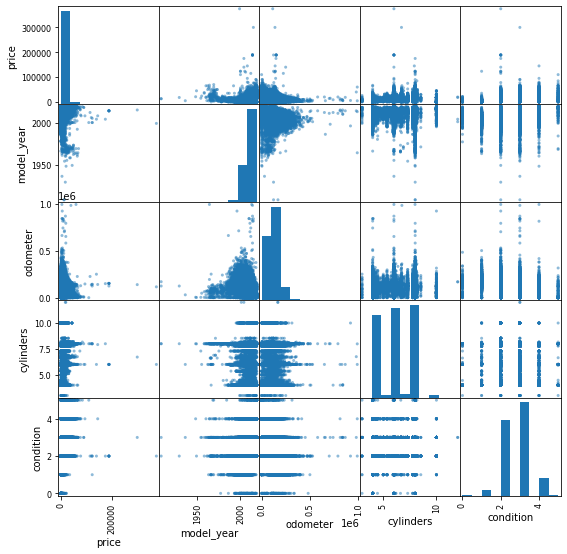

In [62]:
pd.plotting.scatter_matrix(new_data, figsize=(9, 9)) 

<AxesSubplot:>

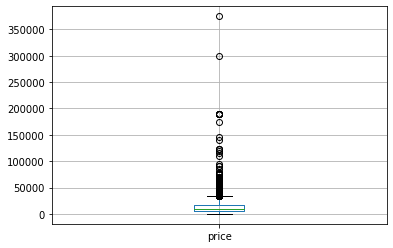

In [63]:
#Diagrama de cajas de la columna 'price'
data[['price']].boxplot()


<AxesSubplot:>

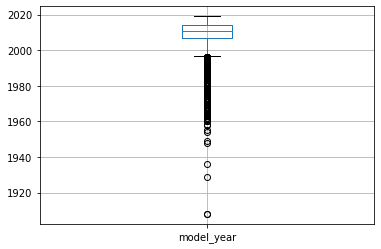

In [64]:
#Diagrama de cajas de la columna 'model_year'
data[['model_year']].boxplot()

Hay mayor cantidad de vehículos en venta en el rango del 1990 al 2020 aproximadamente en el parámetro 'model_year', por lo que se puede establecer un límite inferior para eliminar los valores atípicos.

<AxesSubplot:>

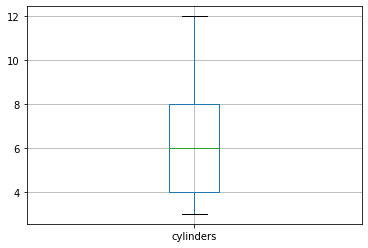

In [65]:
#Diagrama de cajas de la columna 'cylinders'
data[['cylinders']].boxplot()

El parámetro 'cylinders' no posee valores atípicos que deban eliminarse.

<AxesSubplot:>

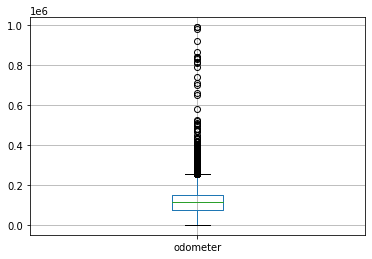

In [66]:
#Diagrama de cajas de la columna 'odometer'
data[['odometer']].boxplot()

<AxesSubplot:>

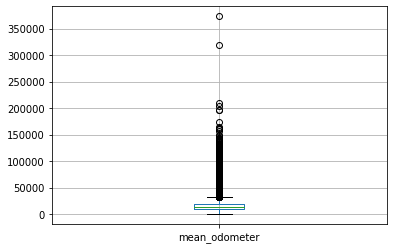

In [67]:
#Diagrama de cajas de la columna 'cylinders'
data[['mean_odometer']].boxplot()

En el gráfico de de correlación se muestra una correlación negativa entre el millaje y el precio, así como también una correlación positiva entre el año del modelo y el precio. 

Se observa que en el parámetro de millaje hay valores atípicos muy superiores que podrían eliminarse. 

El diagrama de cajas del millaje promedio tiene una valores atípicos superiores; sin embargo, serán eliminados al tratar los valores atípicos de la columna 'odometer'.

## Estudiar y tratar valores atípicos



In [68]:
new_data.describe()

,price,model_year,odometer,cylinders,condition
count,51484.000000,51484.000000,51484.000000,51484.00000,51484.000000
mean,12114.333676,2009.791003,115520.255282,6.12438,2.637247
std,10024.214376,6.101138,60567.728845,1.64530,0.712657
min,1.000000,1908.000000,0.000000,3.00000,0.000000
25%,5000.000000,2007.000000,77000.000000,4.00000,2.000000
50%,9000.000000,2011.000000,115161.000000,6.00000,3.000000
75%,16799.250000,2014.000000,148000.000000,8.00000,3.000000
max,375000.000000,2019.000000,990000.000000,12.00000,5.000000


In [69]:
# Determinamos los límites inferiores para valores atípicos
#quito los inferiores en model_year
Q1_model_year = data['model_year'].quantile(0.25)
Q3_model_year = data['model_year'].quantile(0.75)
IQR_model_year = Q3_model_year - Q1_model_year
IQR_model_year
limite_inferior=Q1_model_year-1.5*IQR_model_year
limite_inferior

1996.5

In [70]:
# Determinamos los límites superiores para valores atípicos
#quito los altos en odometer
Q1_odometer = data['odometer'].quantile(0.25)
Q3_odometer = data['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
IQR_odometer
limite_superior=Q3_odometer+1.5*IQR_odometer
limite_superior

254500.0

Se identificaron los valores atípicos en los parámetros 'model_yaer' y 'odometer'. Los valores atípicos para 'model_year' son los valores menores a 1996.5, mientras que para 'odometer' son los valores mayores a 282500.

In [71]:
# Almacenamos los datos sin valores atípicos en un DataFrame separado
data=data.query('model_year>@limite_inferior & odometer<@limite_superior')

## Estudiar parámetros principales sin valores atípicos

In [72]:
data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_posted,mean_odometer
count,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000,49400.000000
mean,12330.067895,2010.406194,2.657328,6.090881,111730.932857,39.540789,2018.307490,15505.586925
std,10060.302827,4.916430,0.702738,1.644391,53736.474607,28.197117,0.461459,11659.748376
min,1.000000,1997.000000,0.000000,3.000000,0.000000,0.000000,2018.000000,0.000000
25%,5300.000000,2007.000000,2.000000,4.000000,76431.000000,19.000000,2018.000000,9583.725966
50%,9500.000000,2011.000000,3.000000,6.000000,113419.000000,33.000000,2018.000000,13192.312500
75%,16990.000000,2014.000000,3.000000,8.000000,144403.250000,53.000000,2019.000000,18152.873267
max,375000.000000,2019.000000,5.000000,12.000000,254344.000000,271.000000,2019.000000,195700.000000


Comparando el parámetro 'model_year' con valores atípicos y sin ellos.

<AxesSubplot:>

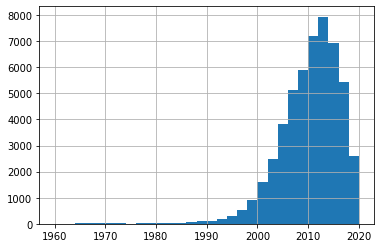

In [73]:
new_data['model_year'].hist(bins=30,range=(1960,2020)) #con valores atípicos

<AxesSubplot:>

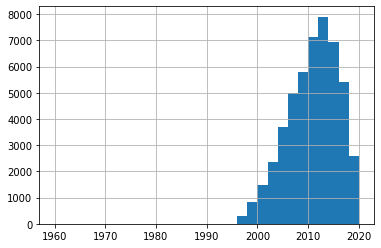

In [74]:
data['model_year'].hist(bins=30,range=(1960,2020)) #sin valores atípicos

En el histograma se aprecia que se la cantidad de valores inferiores atípicos en la columna 'model_year' que han sido eliminados no influyen en los datos restantes.

Comparando el parámetro 'odometer' con valores atípicos y sin ellos.

<AxesSubplot:>

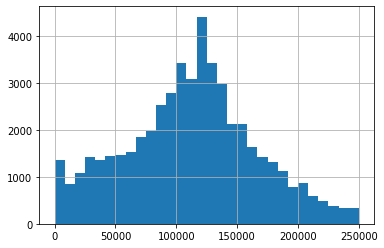

In [75]:
new_data['odometer'].hist(bins=30,range=(0,250000)) #con valores atípicos


<AxesSubplot:>

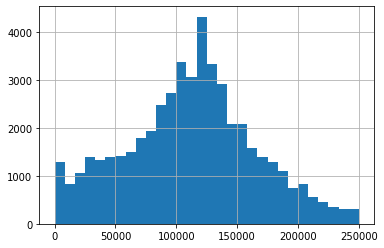

In [76]:
data['odometer'].hist(bins=30,range=(0,250000)) #sin valores atípicos

En el histograma se aprecia que se la cantidad de valores superiores atípicos en la columna 'odometer' que han sido eliminados no influyen en los datos restantes. 

## Periodo de colocación de los anuncios


In [77]:
data['days_listed'].describe()

count    49400.000000
mean        39.540789
std         28.197117
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

En promedio, los anuncios fueron publicados durante 39 días en promedio, siendo el mínimo 0 días y el máximo 271 días. Este último fue anormalmente largo comparándolo con el tercer cuartil.

## Precio promedio por cada tipo de vehículo

<AxesSubplot:xlabel='type'>

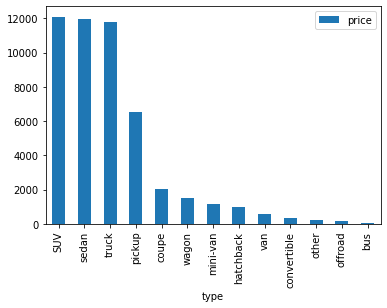

In [78]:
data.pivot_table(index='type',values='price',aggfunc='count').sort_values(by=['price'],ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='type'>

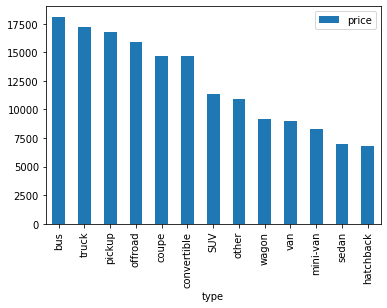

In [79]:
data.pivot_table(index='type',values='price').sort_values(by=['price'],ascending=False).plot(kind='bar')

Los tipos de vehículos más caros son bus y truck; sin embargo, los tipos de vehículos que poseen mayor cantidad de anuncios son SUV y sedan.

## Factores de precio

Se tomaron los valores de 'model_year', 'odometer', 'condition', 'transmission' y 'paint_color' para el estudio de correlación con el precio. Se trazaron gráficos de caja para las variables categóricas, mientras que se realizaron gráficos de dispersión para 'transmission' y 'paint_color'.

In [80]:
new_data_2=data[['price','odometer','model_year','condition','transmission','paint_color']]
new_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49400 entries, 0 to 51483
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         49400 non-null  float64
 1   odometer      49400 non-null  float64
 2   model_year    49400 non-null  int64  
 3   condition     49400 non-null  int64  
 4   transmission  49400 non-null  object 
 5   paint_color   49400 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.6+ MB


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='model_year', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='model_year', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='model_year'>,
        <AxesSubplot:xlabel='odometer', ylabel='model_year'>,
        <AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='condition', ylabel='model_year'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition'>,
        <AxesSubplot:xlabel='model_year', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>]],
      dtype=object)

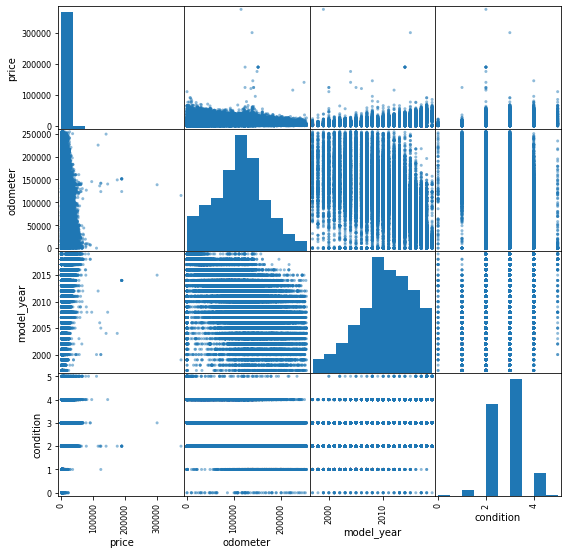

In [81]:
pd.plotting.scatter_matrix(new_data_2, figsize=(9, 9)) 

In [82]:
new_data_2.groupby('transmission')['price'].count()

transmission
automatic    45215
manual        2405
other         1780
Name: price, dtype: int64

In [83]:
new_data_2.groupby('paint_color')['price'].count()

paint_color
black      7440
blue       4264
brown      1141
custom     1100
green      1254
grey       4942
orange      217
purple       84
red        4138
silver     6110
unknown    8888
white      9591
yellow      231
Name: price, dtype: int64

Todas las variables categóricas en 'transmission' y 'paint_color' presentan más de 50 anuncios.

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

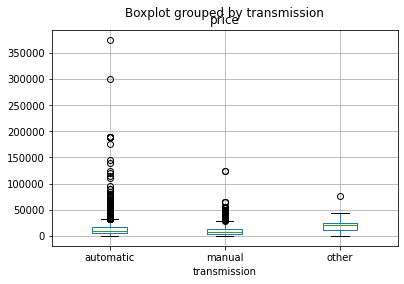

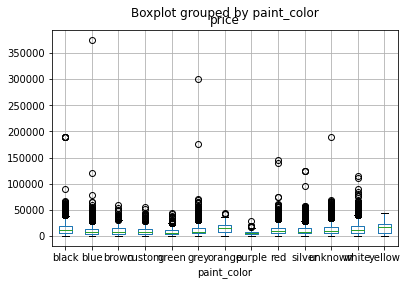

In [84]:
new_data_2.boxplot('price','transmission',grid=True)
new_data_2.boxplot('price','paint_color',grid=True)

Hay más vehículos de transmisión automática que manuales y otras opciones; sin embargo, la media y mediana de los precios de otros tipos de transmisión es superior a los de transmisión automática o manual.
los colores tienen una distribución pareja exceptuando los colores naranja, púrpura y amarillo.


## Conclusión general

1. Hay una correlación positiva entre el precio y el estado del auto vendido.
2. No hay una correlación entre el color del autio y el precio; sin embargo, los autos de color blanco presentan un promedio mayor al resto de colores.
3. Los autos de transmisión automática tuvieron una media y mediana ligeramente superior que los autos de transmisión manual. Existe una relación directa entre el nivel de ingresos y el pago de préstamos a tiempo. Mientras el nivel de ingresos aumenta, hay menor probabilidad de endeudamiento.
4. Los valores ausentes fueron reemplazados por la mediana del parámetro en función del modelo del auto, exceptuando los valores nulos en la columna 'is_4wd', los cuales fueron reemplazados por 0, debido a que el valor 1 indica si el vehículo tiene tracción en cuatro ruedas.
5. No se encontró información duplicada. 
6. Se eliminaron las filas con  valores atípicos en las columnas de 'model_year' y 'odometer'.
7. Se encontró una correlación negativa entre el millaje y el precio de los autos.
8. Se encontró una correlación positiva entre el año del modelo y el precio de los autos.